<a href="https://colab.research.google.com/github/falloutdey/Atividade1_LLM_e_Estatistica/blob/main/Atividade1_LLM_e_Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 1: Z-score and Binomial Distribution

##A: Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados. Não esqueça do contexto sobre o dataset usado, com a explicação sobre ele, suas classes e features.

* Foi utilizado o dataset Titanic, disponível na biblioteca seaborn do Python. Esse conjunto de dados contém informações sobre os passageiros do navio Titanic, incluindo variáveis demográficas e socioeconômicas, assim como a informação sobre quem sobreviveu ao naufrágio. A variável alvo do conjunto de dados é “survived”, que representa duas classes: passageiros que sobreviveram e passageiros que não sobreviveram.

* Para análise, eu escolhi duas features numéricas: idade (age) e tarifa (fare). Eu escolhi essas duas porque faz sentido imaginar que pessoas com condições melhores (que pagaram tarifas maiores) podem ter tido mais chances de sobreviver, e a idade também pode influenciar. Então vale a pena ver como esses valores se distribuem entre quem sobreviveu e quem não sobreviveu. Depois disso, eu fiz dois conjuntos de histogramas.


###Histograma 1 (10 bins):

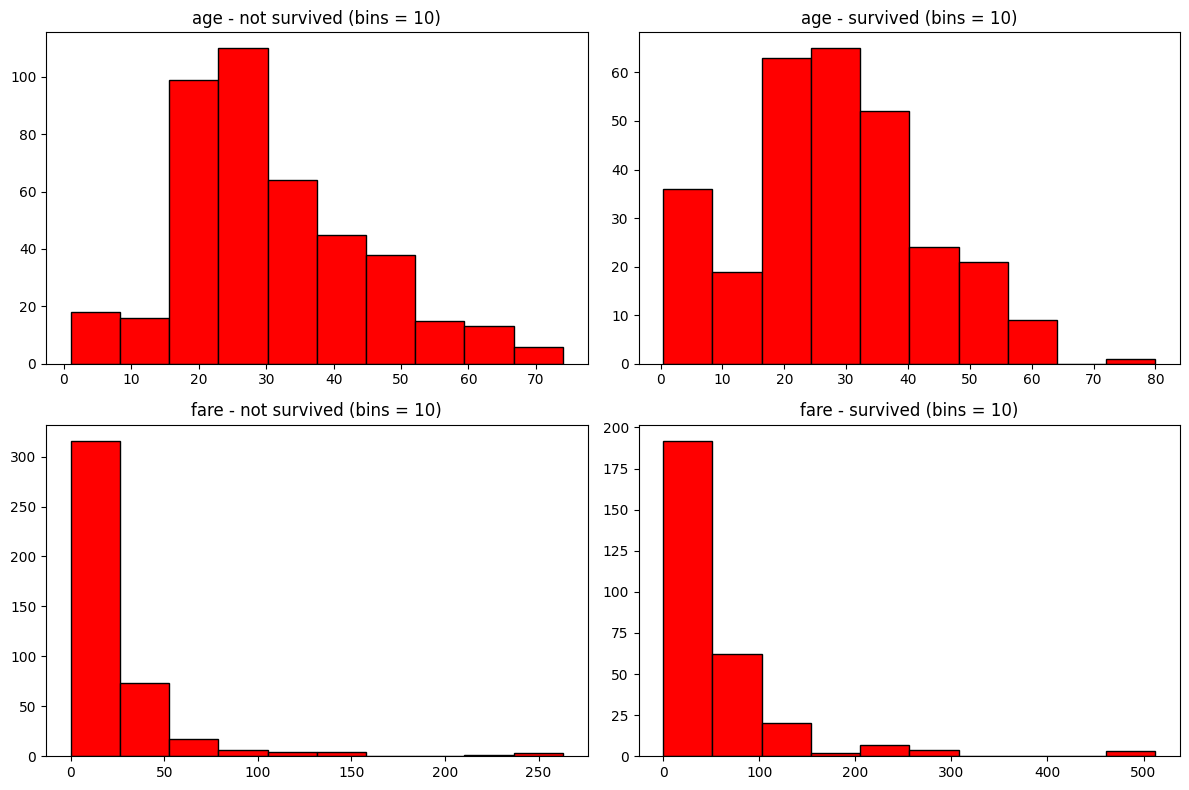

In [3]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

#Inserção dos Dados
dados = sb.load_dataset("titanic")
dados = dados[["age", "fare", "survived"]].dropna()
dados["survived"] = dados["survived"].map({0: "not survived", 1: "survived"})

#Definição de Classes e Features
classes = ["not survived", "survived"]
features = ["age", "fare"]

fig, matriz = plt.subplots(2, 2, figsize = (12, 8))

for i, feat in enumerate(features):
  for j, classe in enumerate(classes):
    dadosFinais = dados[dados["survived"] == classe][feat]
    matriz[i][j].hist(dadosFinais, bins=10, color="red", edgecolor="black")
    matriz[i][j].set_title(f"{feat} - {classe} (bins = 10)")

plt.tight_layout()
plt.show()

###Histograma 2 (30 bins):

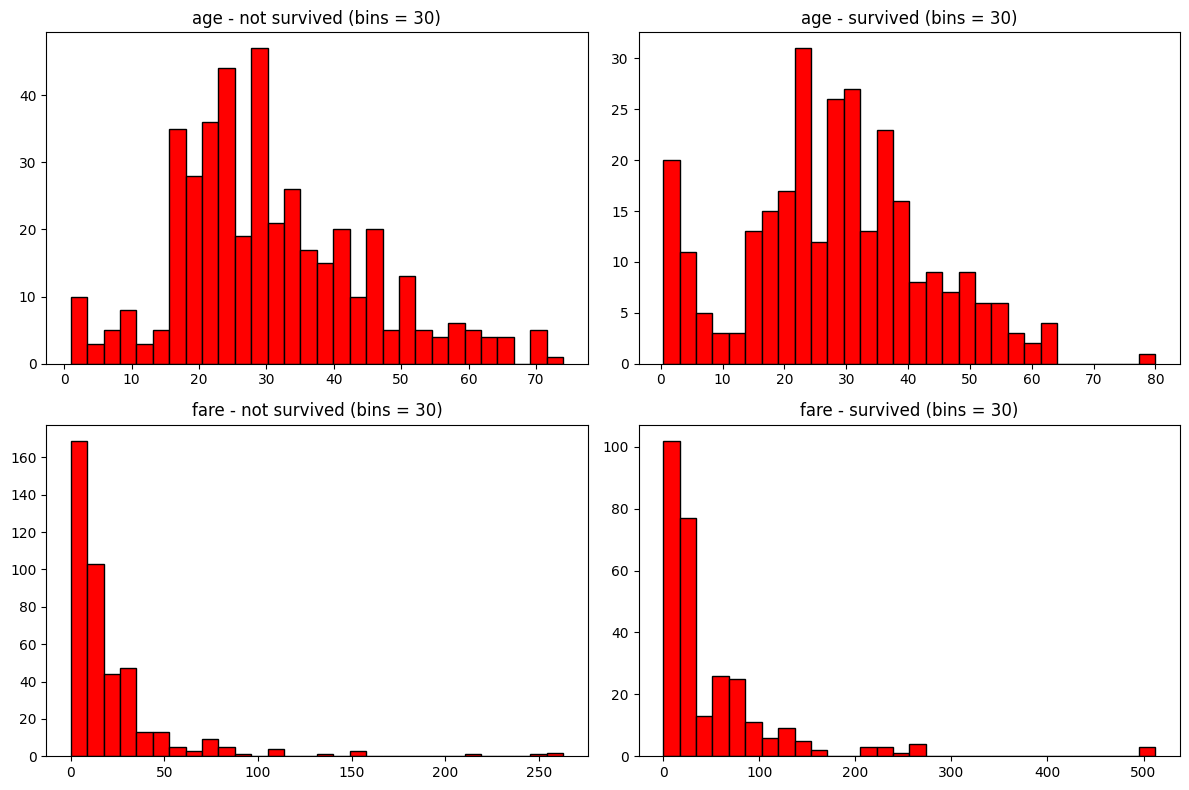

In [5]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

#Inserção dos Dados
dados = sb.load_dataset("titanic")
dados = dados[["age", "fare", "survived"]].dropna()
dados["survived"] = dados["survived"].map({0: "not survived", 1: "survived"})

#Definição de Classes e Features
classes = ["not survived", "survived"]
features = ["age", "fare"]

fig, matriz = plt.subplots(2, 2, figsize = (12, 8))

for i, feat in enumerate(features):
  for j, classe in enumerate(classes):
    dadosFinais = dados[dados["survived"] == classe][feat]
    matriz[i][j].hist(dadosFinais, bins=30, color="red", edgecolor="black")
    matriz[i][j].set_title(f"{feat} - {classe} (bins = 30)")

plt.tight_layout()
plt.show()